In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
food_prices = pd.read_csv('E:\\OtherCodeProjects\\Springboard Capstone Projects\\Springboard-Capstone-2-Data\\global_food_prices.csv')

C:\Users\William\AppData\Local\Temp\ipykernel_11036\782582035.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  food_prices = pd.read_csv('E:\\OtherCodeProjects\\Springboard Capstone Projects\\Springboard-Capstone-2-Data\\global_food_prices.csv')


In [3]:
food_prices.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [4]:
food_prices.describe(include='all')

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
count,2.050638e+06,2050638,2.050638e+06,1439622,2.050638e+06,2050638,2.050638e+06,2050638,2050638.0,2050638,2.050638e+06,2050638,2.050638e+06,2050638,2.050638e+06,2.050638e+06,2.050638e+06,0.0
unique,NaN,98,NaN,617,NaN,3235,NaN,838,NaN,84,NaN,4,NaN,125,NaN,NaN,NaN,NaN
top,NaN,Rwanda,NaN,North/Amajyaruguru,NaN,National Average,NaN,Millet - Retail,NaN,XOF,NaN,Retail,NaN,KG,NaN,NaN,NaN,NaN
freq,NaN,137746,NaN,34770,NaN,19748,NaN,55898,NaN,270646,NaN,1878421,NaN,1523770,NaN,NaN,NaN,NaN
mean,1.004064e+03,NaN,2.631071e+04,NaN,1.591207e+03,NaN,2.201166e+02,NaN,0.0,NaN,1.491768e+01,NaN,1.486924e+01,NaN,6.363021e+00,2.016131e+03,6.413984e+03,NaN
std,7.163519e+03,NaN,1.159529e+05,NaN,1.181314e+03,NaN,1.938963e+02,NaN,0.0,NaN,2.831222e-01,NaN,2.598690e+01,NaN,3.403189e+00,4.458825e+00,1.069772e+05,NaN
min,1.000000e+00,NaN,0.000000e+00,NaN,8.000000e+01,NaN,5.000000e+01,NaN,0.0,NaN,1.400000e+01,NaN,5.000000e+00,NaN,1.000000e+00,1.990000e+03,0.000000e+00,NaN
25%,1.050000e+02,NaN,1.510000e+03,NaN,6.440000e+02,NaN,7.300000e+01,NaN,0.0,NaN,1.500000e+01,NaN,5.000000e+00,NaN,3.000000e+00,2.014000e+03,4.500000e+01,NaN
50%,1.500000e+02,NaN,2.156000e+03,NaN,1.441000e+03,NaN,1.410000e+02,NaN,0.0,NaN,1.500000e+01,NaN,5.000000e+00,NaN,6.000000e+00,2.017000e+03,2.465558e+02,NaN
75%,2.050000e+02,NaN,3.433000e+03,NaN,2.331000e+03,NaN,3.030000e+02,NaN,0.0,NaN,1.500000e+01,NaN,9.000000e+00,NaN,9.000000e+00,2.020000e+03,1.200000e+03,NaN


In [5]:
# Dropping useless columns
food_prices.drop(columns=['mp_commoditysource', 'cur_id'], inplace=True)

# Converting date columns to datetime
food_prices = food_prices.rename(columns={'mp_month':'month', 'mp_year':'year'})
food_prices['day'] = 1
food_prices['date'] = pd.to_datetime(food_prices[['year', 'month', 'day']])
food_prices.drop(columns=['year', 'month', 'day'], inplace=True)
food_prices.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_name,pt_id,pt_name,um_id,um_name,mp_price,date
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-01-01
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-02-01
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-03-01
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-04-01
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-05-01


Creating a column of days since Jan 1 1970, in order to have a single numbered column to serve as an index later

In [6]:
food_prices['days'] = [i.days for i in food_prices['date'] - datetime.datetime(1970, 1, 1)]
food_prices.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_name,pt_id,pt_name,um_id,um_name,mp_price,date,days
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-01-01,16071
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-02-01,16102
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-03-01,16130
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-04-01,16161
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-05-01,16191


In [7]:
years = food_prices.groupby(by='adm0_name')['date'].min().sort_values().to_frame()
years.reset_index(inplace=True)
years.head(n=10)

,adm0_name,date
0,Niger,1990-01-01
1,Burkina Faso,1992-01-01
2,Mozambique,1992-11-01
3,Bassas da India,1994-01-01
4,Peru,1995-01-01
5,Somalia,1995-01-01
6,Armenia,1996-01-01
7,Bangladesh,1998-07-01
8,Afghanistan,2000-01-01
9,Nicaragua,2000-01-01


In [8]:
years_max = food_prices.groupby(by='adm0_name')['date'].max().sort_values().to_frame()
years_max.reset_index(inplace=True)
years_max[years_max['adm0_name']=='Niger']

,adm0_name,date
84,Niger,2021-07-01


In [9]:
total_count = food_prices.groupby(by='adm0_name')['adm0_id'].count().sort_values(ascending=False).to_frame()
total_count.reset_index(inplace=True)
total_count.head(n=10)

,adm0_name,adm0_id
0,Rwanda,137746
1,Bassas da India,137093
2,Syrian Arab Republic,116588
3,Philippines,82099
4,Mali,73843
5,Indonesia,72437
6,Kyrgyzstan,61188
7,Burundi,60921
8,Gambia,56971
9,Niger,54974


In [10]:
good_count = food_prices.groupby(by='cm_name')['adm0_id'].count().sort_values(ascending=False).to_frame()
good_count.reset_index(inplace=True)
good_count.head(n=10)

,cm_name,adm0_id
0,Millet - Retail,55898
1,Rice (imported) - Retail,53601
2,Maize - Retail,48596
3,Sorghum - Retail,46507
4,Wheat flour - Retail,46360
5,Sugar - Retail,46082
6,Maize (white) - Retail,41717
7,Rice - Retail,40290
8,Rice (local) - Retail,37815
9,Tomatoes - Retail,31364


My first thought was to convert all prices into USD, but only a few countries have the exchange rate listed, so I will have to keep the local currency and rely on percent changes to get some convertability between countries

In [11]:
exchange_rate = food_prices[food_prices['cm_name']=='Exchange rate - Retail'].groupby(by='adm0_name').count()
exchange_rate

,adm0_id,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_name,pt_id,pt_name,um_id,um_name,mp_price,date,days
adm0_name,,,,,,,,,,,,,,,
Afghanistan,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070
Armenia,38,38,0,38,38,38,38,38,38,38,38,38,38,38,38
Chad,35,35,0,35,35,35,35,35,35,35,35,35,35,35,35
Democratic Republic of the Congo,1991,1991,1991,1991,1991,1991,1991,1991,1991,1991,1991,1991,1991,1991,1991
Ethiopia,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
Liberia,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024
Somalia,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284
South Sudan,73,73,0,73,73,73,73,73,73,73,73,73,73,73,73


In [12]:
food_prices.describe()

,adm0_id,adm1_id,mkt_id,cm_id,pt_id,um_id,mp_price,days
count,2.050638e+06,2.050638e+06,2.050638e+06,2.050638e+06,2.050638e+06,2.050638e+06,2.050638e+06,2.050638e+06
mean,1.004064e+03,2.631071e+04,1.591207e+03,2.201166e+02,1.491768e+01,1.486924e+01,6.413984e+03,1.701174e+04
std,7.163519e+03,1.159529e+05,1.181314e+03,1.938963e+02,2.831222e-01,2.598690e+01,1.069772e+05,1.623934e+03
min,1.000000e+00,0.000000e+00,8.000000e+01,5.000000e+01,1.400000e+01,5.000000e+00,0.000000e+00,7.305000e+03
25%,1.050000e+02,1.510000e+03,6.440000e+02,7.300000e+01,1.500000e+01,5.000000e+00,4.500000e+01,1.613000e+04
50%,1.500000e+02,2.156000e+03,1.441000e+03,1.410000e+02,1.500000e+01,5.000000e+00,2.465558e+02,1.744000e+04
75%,2.050000e+02,3.433000e+03,2.331000e+03,3.030000e+02,1.500000e+01,9.000000e+00,1.200000e+03,1.835300e+04
max,7.000100e+04,9.000220e+05,6.083000e+03,8.930000e+02,1.800000e+01,1.750000e+02,2.177778e+07,1.884000e+04


In [13]:
datapath = 'E:/OtherCodeProjects/Springboard Capstone Projects/Springboard-Capstone-2-Data/global_food_prices_f.csv'
food_prices.to_csv(datapath, index=False)

In [14]:
def global_price_change(df, cm_name, adm0_name):
    """Creates a dataframe of the average change in price (in percent) of a particular good for each day, while excluding one country
        
        df = the dataframe to use

        cm_name = the name of the good
        
        adm0_name = the name of the country to exclude"""
    
    # Creating a dataframe of only one good and excluding one country (to prevent data leakage)
    one_food = df[(df['cm_name']==cm_name) & (df['adm0_name'] != adm0_name)]

    # Calculating the percent change in the price of that good for all remaining countries
    one_food['pct_change'] = one_food['mp_price'].pct_change()

    # Grouping by date across all countries and calculating the mean of all percent changes
    one_food_avg = one_food.groupby(by='date')['pct_change'].mean().sort_values().to_frame()
    one_food_avg.reset_index(inplace=True)
    one_food_avg.sort_values(by='date', inplace=True)
    one_food_avg.reset_index(inplace=True, drop=True)
    
    return one_food_avg

In [15]:
millet_avg = global_price_change(food_prices, 'Millet - Retail', 'Niger')

millet_avg

C:\Users\William\AppData\Local\Temp\ipykernel_11036\1692134763.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_food['pct_change'] = one_food['mp_price'].pct_change()


,date,pct_change
0,1992-01-01,-0.723219
1,1992-02-01,0.073370
2,1992-03-01,0.048017
3,1992-04-01,0.001899
4,1992-05-01,-0.008822
...,...,...
350,2021-03-01,0.038914
351,2021-04-01,0.047179
352,2021-05-01,0.030019
353,2021-06-01,0.033325


In [18]:
millet_avg['undiff_change'] = np.nan

for i in range(0, len(millet_avg)):
    if i == 0 :
        millet_avg.loc[i, 'undiff_change'] = 1
    else:
        millet_avg.loc[i, 'undiff_change'] = millet_avg.loc[i-1, 'undiff_change'] * (1 + millet_avg.loc[i, 'pct_change'])

millet_avg

,date,pct_change,undiff_change
0,1992-01-01,-0.723219,1.000000
1,1992-02-01,0.073370,1.073370
2,1992-03-01,0.048017,1.124910
3,1992-04-01,0.001899,1.127046
4,1992-05-01,-0.008822,1.117103
...,...,...,...
350,2021-03-01,0.038914,13.099051
351,2021-04-01,0.047179,13.717046
352,2021-05-01,0.030019,14.128817
353,2021-06-01,0.033325,14.599658


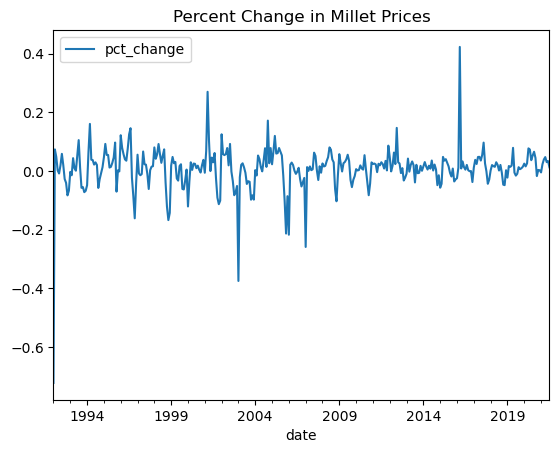

In [19]:
millet_avg.plot(x='date', y='pct_change')
plt.title('Percent Change in Millet Prices')
plt.show()

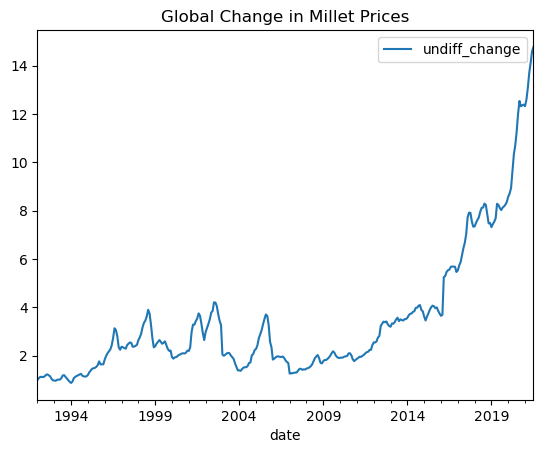

In [22]:
millet_avg.plot(x='date', y='undiff_change')
plt.title('Global Change in Millet Prices')
plt.show()

In [21]:
datapath = 'E:/OtherCodeProjects/Springboard Capstone Projects/Springboard-Capstone-2-Data/global_millet_price_change.csv'
millet_avg.to_csv(datapath, index=False)